In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
from data_loader import load_amsterdam_data
import pandas as pd


In [10]:
df_agents = pd.DataFrame(load_amsterdam_data())

In [11]:
types = ["single", "couple_no_kids", "single_parent", "with_kids"]

In [12]:
print(df_agents["household_type"].value_counts())


household_type
single            6656
couple_no_kids    2530
single_parent      588
with_kids          226
Name: count, dtype: int64


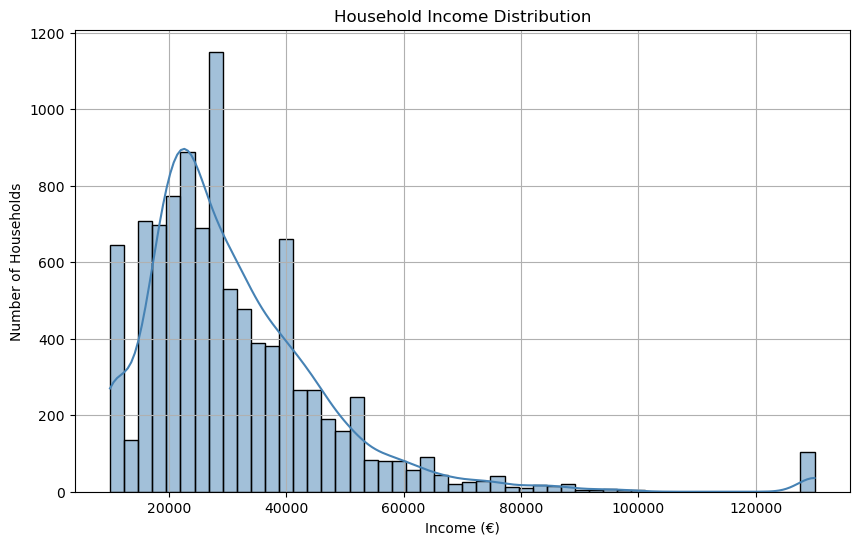

In [13]:
# income distribution
plt.figure(figsize=(10, 6))
sns.histplot(df_agents["income"], bins=50, kde=True, color="steelblue")
plt.title("Household Income Distribution")
plt.xlabel("Income (€)")
plt.ylabel("Number of Households")
plt.grid(True)
plt.show()


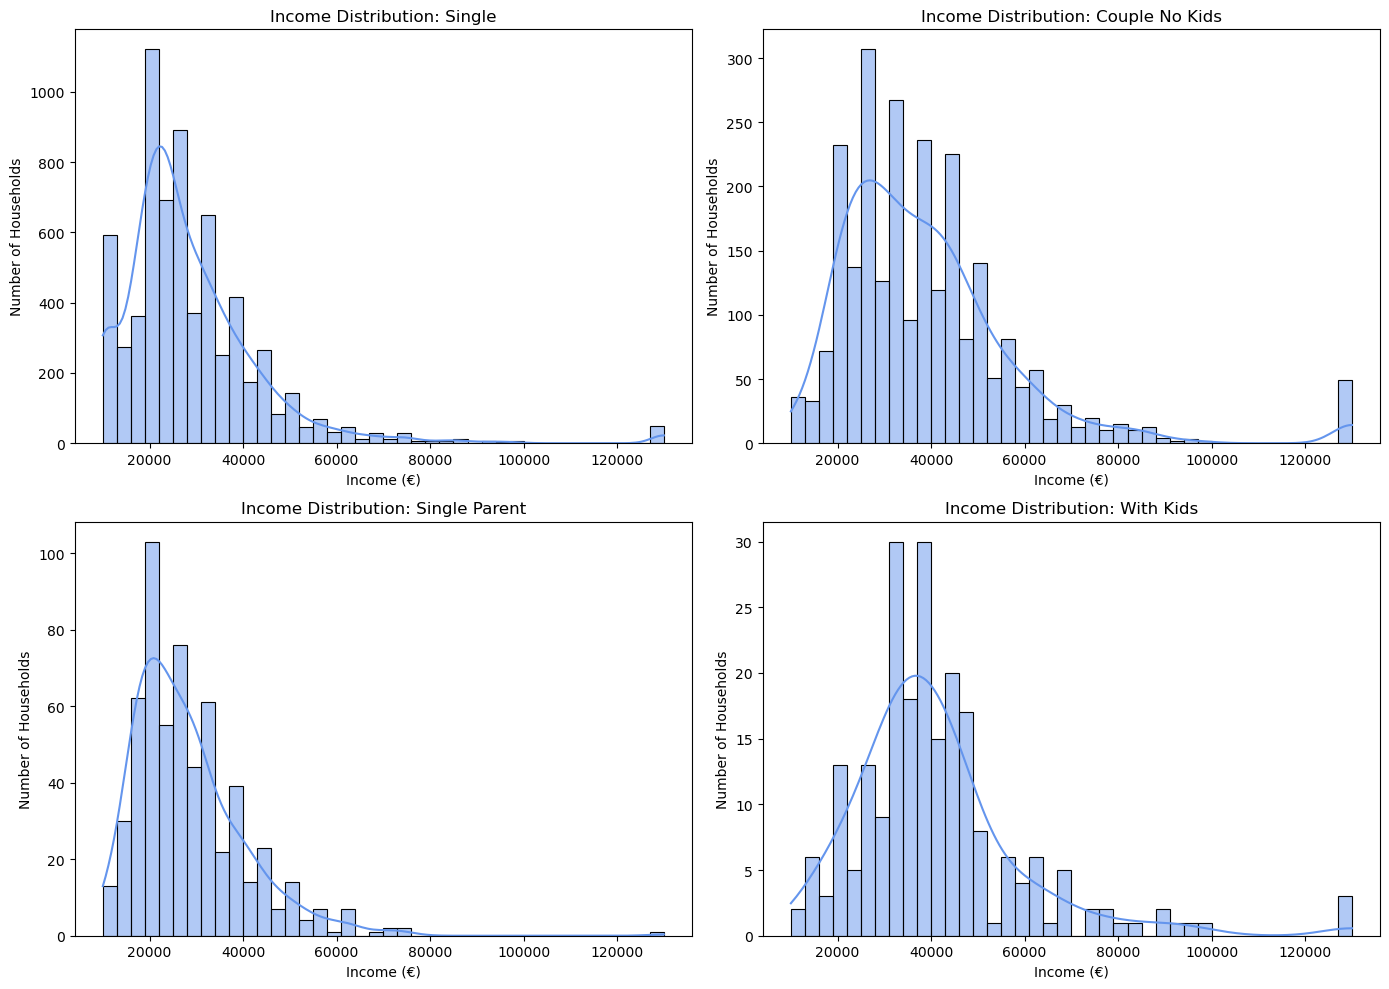

In [14]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

for i, hh_type in enumerate(types):
    sns.histplot(
        data=df_agents[df_agents["household_type"] == hh_type],
        x="income",
        bins=40,
        kde=True,
        color="cornflowerblue",
        ax=axes[i]
    )
    axes[i].set_title(f"Income Distribution: {hh_type.replace('_', ' ').title()}")
    axes[i].set_xlabel("Income (€)")
    axes[i].set_ylabel("Number of Households")

plt.tight_layout()
plt.show()

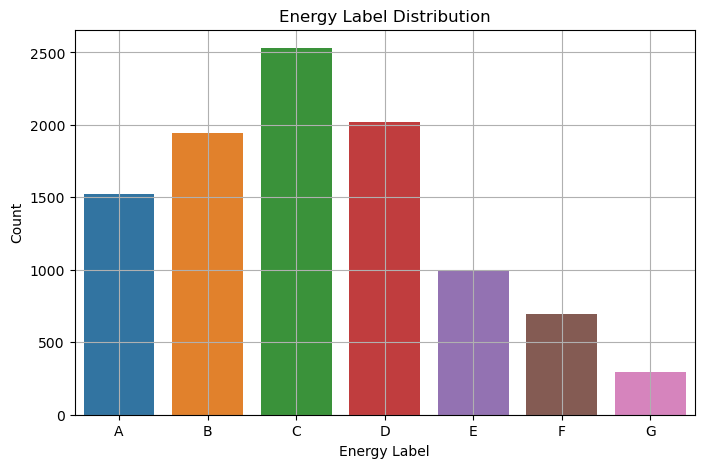

In [15]:
# energy label distribution
plt.figure(figsize=(8, 5))
sns.countplot(data=df_agents, x="energielabel", order=sorted(df_agents["energielabel"].unique()))
plt.title("Energy Label Distribution")
plt.xlabel("Energy Label")
plt.ylabel("Count")
plt.grid(True)
plt.show()

In [16]:
vuln_ratio = df_agents["lihe"].mean()
print(f"Vulnerable household ratio: {vuln_ratio:.2%}")


Vulnerable household ratio: 5.40%


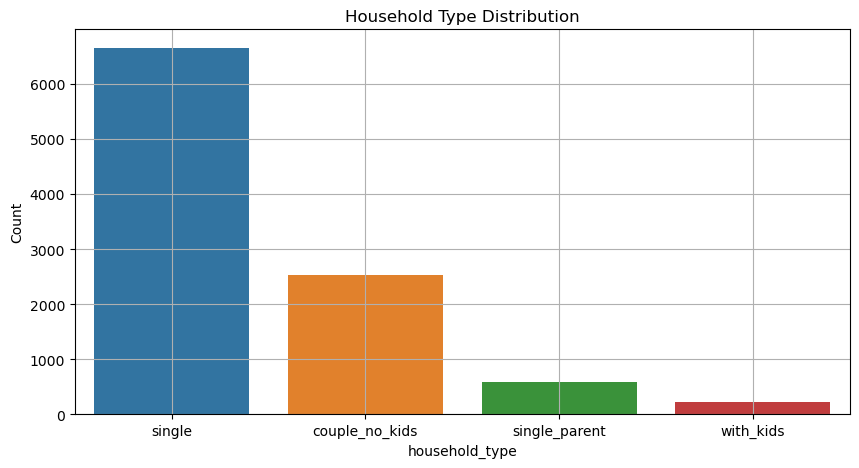

In [17]:
# hh type distribution
plt.figure(figsize=(10, 5))
sns.countplot(data=df_agents, x="household_type", order=["single", "couple_no_kids", "single_parent", "with_kids"])
plt.title("Household Type Distribution")
plt.ylabel("Count")
plt.grid(True)
plt.show()
